In [1]:
import numpy as np
import pandas as pd
import torch

In [2]:
## Data Preprocess + First Model ##

In [3]:
import json
with open('../data/preprocessed.json', 'r') as file:
    data = json.load(file)

In [4]:
data = pd.DataFrame(data)
data

,player_id,date,first_name,last_name,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,...,ft_pct,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts
0,56677844,1729728000000,Bilal,Coulibaly,1,2,0.500000,0,0,0.000000,...,0.75,1,5,6,6,1,0,3,0,8
1,265,1729728000000,Kyle,Kuzma,6,16,0.375000,0,5,0.000000,...,0.00,0,2,2,1,1,1,1,1,12
2,1028028405,1729728000000,Alexandre,Sarr,1,7,0.142857,0,5,0.000000,...,0.00,1,4,5,1,0,2,0,2,2
3,666848,1729728000000,Jordan,Poole,9,17,0.529412,6,11,0.545455,...,1.00,0,1,1,4,4,1,4,3,26
4,1028025235,1729728000000,Carlton,Carrington,1,6,0.166667,0,2,0.000000,...,0.50,0,3,3,2,0,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,486,1731628800000,Christian,Wood,0,0,0.000000,0,0,0.000000,...,0.00,0,0,0,0,0,0,0,0,0
6413,1028026974,1731628800000,Dalton,Knecht,0,1,0.000000,0,1,0.000000,...,0.00,0,0,0,0,0,0,0,0,0
6414,237,1731628800000,LeBron,James,0,1,0.000000,0,0,0.000000,...,0.00,0,1,1,0,0,0,1,0,0
6415,117,1731628800000,Anthony,Davis,0,1,0.000000,0,0,0.000000,...,0.00,0,0,0,0,0,0,0,0,0


In [5]:
data['date'] = pd.to_datetime(data['date'], unit='ms')
data

,player_id,date,first_name,last_name,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,...,ft_pct,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts
0,56677844,2024-10-24,Bilal,Coulibaly,1,2,0.500000,0,0,0.000000,...,0.75,1,5,6,6,1,0,3,0,8
1,265,2024-10-24,Kyle,Kuzma,6,16,0.375000,0,5,0.000000,...,0.00,0,2,2,1,1,1,1,1,12
2,1028028405,2024-10-24,Alexandre,Sarr,1,7,0.142857,0,5,0.000000,...,0.00,1,4,5,1,0,2,0,2,2
3,666848,2024-10-24,Jordan,Poole,9,17,0.529412,6,11,0.545455,...,1.00,0,1,1,4,4,1,4,3,26
4,1028025235,2024-10-24,Carlton,Carrington,1,6,0.166667,0,2,0.000000,...,0.50,0,3,3,2,0,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,486,2024-11-15,Christian,Wood,0,0,0.000000,0,0,0.000000,...,0.00,0,0,0,0,0,0,0,0,0
6413,1028026974,2024-11-15,Dalton,Knecht,0,1,0.000000,0,1,0.000000,...,0.00,0,0,0,0,0,0,0,0,0
6414,237,2024-11-15,LeBron,James,0,1,0.000000,0,0,0.000000,...,0.00,0,1,1,0,0,0,1,0,0
6415,117,2024-11-15,Anthony,Davis,0,1,0.000000,0,0,0.000000,...,0.00,0,0,0,0,0,0,0,0,0


In [6]:
# Combine first_name and last_name
data['player_name'] = data['first_name'] + ' ' + data['last_name']
# Remove first_name, last_name, turnover, pf, and player_id columns
data = data.drop(columns=['player_id','first_name','last_name','turnover','pf'])
# Move player_name to front
data = data[['player_name'] + data.columns.drop('player_name').tolist()]
data

,player_name,date,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,pts
0,Bilal Coulibaly,2024-10-24,1,2,0.500000,0,0,0.000000,6,8,0.75,1,5,6,6,1,0,8
1,Kyle Kuzma,2024-10-24,6,16,0.375000,0,5,0.000000,0,0,0.00,0,2,2,1,1,1,12
2,Alexandre Sarr,2024-10-24,1,7,0.142857,0,5,0.000000,0,0,0.00,1,4,5,1,0,2,2
3,Jordan Poole,2024-10-24,9,17,0.529412,6,11,0.545455,2,2,1.00,0,1,1,4,4,1,26
4,Carlton Carrington,2024-10-24,1,6,0.166667,0,2,0.000000,1,2,0.50,0,3,3,2,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,Christian Wood,2024-11-15,0,0,0.000000,0,0,0.000000,0,0,0.00,0,0,0,0,0,0,0
6413,Dalton Knecht,2024-11-15,0,1,0.000000,0,1,0.000000,0,0,0.00,0,0,0,0,0,0,0
6414,LeBron James,2024-11-15,0,1,0.000000,0,0,0.000000,0,0,0.00,0,1,1,0,0,0,0
6415,Anthony Davis,2024-11-15,0,1,0.000000,0,0,0.000000,0,0,0.00,0,0,0,0,0,0,0


In [7]:
# Check for missing values
data.isna().sum() # None, Yay!

player_name    0
date           0
fgm            0
fga            0
fg_pct         0
fg3m           0
fg3a           0
fg3_pct        0
ftm            0
fta            0
ft_pct         0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
pts            0
dtype: int64

In [8]:
projections = pd.read_json('../data/prizepicks_cleaned.json')
projections = projections[~projections['name'].str.contains(r'\+')]
projections.head()

,type,description,line_score,stat_type,start_time,status,name
11,projection,HOU,27.5,Pts+Rebs,2024-11-15 20:10:00-05:00,pre_game,James Harden
12,projection,HOU,6.0,Rebounds,2024-11-15 20:10:00-05:00,pre_game,James Harden
13,projection,HOU,29.5,Pts+Asts,2024-11-15 20:10:00-05:00,pre_game,James Harden
14,projection,HOU,36.5,Pts+Rebs+Asts,2024-11-15 20:10:00-05:00,pre_game,James Harden
15,projection,HOU,44.5,Fantasy Score,2024-11-15 20:10:00-05:00,pre_game,James Harden


In [9]:
point_projection = projections[projections['stat_type'] == 'Points']
point_projection = point_projection[['name', 'line_score']].reset_index(drop=True)
point_projection.head()

,name,line_score
0,James Harden,21.0
1,Jalen Green,20.5
2,Norman Powell,21.5
3,Alperen Sengun,18.5
4,Ivica Zubac,14.0


In [10]:
data_and_proj = data.merge(point_projection, left_on='player_name', right_on='name', how='inner')
data_and_proj.head()

,player_name,date,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,pts,name,line_score
0,Michael Porter Jr.,2024-10-24,5,17,0.294000,3,10,0.300000,2,2,1.00,1,7,8,2,1,0,15,Michael Porter Jr.,20.0
1,Jamal Murray,2024-10-24,4,13,0.308000,2,5,0.400000,2,2,1.00,2,4,6,4,2,0,12,Jamal Murray,22.5
2,Peyton Watson,2024-10-24,1,7,0.142857,0,4,0.000000,0,0,0.00,2,4,6,1,0,2,2,Peyton Watson,12.5
3,Russell Westbrook,2024-10-24,2,10,0.200000,1,6,0.166667,1,4,0.25,1,4,5,5,1,2,6,Russell Westbrook,12.5
4,Isaiah Joe,2024-10-24,3,10,0.300000,1,6,0.166667,0,0,0.00,1,1,2,1,0,0,7,Isaiah Joe,11.5


In [11]:
data_and_proj = data_and_proj.sort_values(by=['player_name', 'date'])
data_and_proj

,player_name,date,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,pts,name,line_score
42,Alperen Sengun,2024-10-23,10,22,0.454545,2,3,0.666667,3,4,0.75,6,12,18,5,4,1,25,Alperen Sengun,18.5
43,Alperen Sengun,2024-10-23,10,22,0.454545,2,3,0.666667,3,4,0.75,6,12,18,5,4,1,25,Alperen Sengun,24.5
44,Alperen Sengun,2024-10-23,10,22,0.454545,2,3,0.666667,3,4,0.75,6,12,18,5,4,1,25,Alperen Sengun,20.5
45,Alperen Sengun,2024-10-23,10,22,0.454545,2,3,0.666667,3,4,0.75,6,12,18,5,4,1,25,Alperen Sengun,16.5
46,Alperen Sengun,2024-10-23,10,22,0.454545,2,3,0.666667,3,4,0.75,6,12,18,5,4,1,25,Alperen Sengun,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,Zach Edey,2024-11-08,5,8,0.625000,1,2,0.500000,3,3,1.00,2,6,8,2,1,2,14,Zach Edey,14.5
1154,Zach Edey,2024-11-10,5,7,0.714000,1,1,1.000000,1,2,0.50,3,3,6,2,4,1,12,Zach Edey,9.0
1155,Zach Edey,2024-11-10,5,7,0.714000,1,1,1.000000,1,2,0.50,3,3,6,2,4,1,12,Zach Edey,14.5
1266,Zach Edey,2024-11-13,3,8,0.375000,0,0,0.000000,6,6,1.00,4,4,8,1,1,1,12,Zach Edey,9.0


In [12]:
data_and_proj['above_threshold'] = (data_and_proj['pts'] > data_and_proj['line_score']).astype(int)

In [13]:
# Computing the last 5 averages for each player
average_estimates = ['reb', 'ast', 'pts']
for col in average_estimates:
    data_and_proj[f'{col}_avg_last_5'] = data_and_proj.groupby('player_name')[col].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    
# Creating feature "on_hotstreak" to indicate if player is performing higher when compared to their average.
player_avg_pts = data_and_proj.groupby('player_name')['pts'].transform('mean')
player_avg_asts = data_and_proj.groupby('player_name')['ast'].transform('mean')
player_avg_reb = data_and_proj.groupby('player_name')['reb'].transform('mean')

# Then, compare the last 5-game average to the player's overall average and convert boolean to integers 
# where (1 if on hotstreak, 0 if not)
data_and_proj['on_hotstreak_pts'] = (data_and_proj['pts_avg_last_5'] > player_avg_pts).astype(int)
data_and_proj['on_hotstreak_asts'] = (data_and_proj['ast_avg_last_5'] > player_avg_asts).astype(int)
data_and_proj['on_hotstreak_reb'] = (data_and_proj['reb_avg_last_5'] > player_avg_reb).astype(int)

In [14]:
# Scale to normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['fgm', 'fga', 'pts','fg3m','fg3a','fta','ftm']
data_and_proj[numerical_cols] = scaler.fit_transform(data_and_proj[numerical_cols])

In [15]:
features = ["fgm", "fga", "pts", "fg3m", "fg3a", "fta",'ftm', "on_hotstreak_pts"]
X = data_and_proj[features]
y = data_and_proj["above_threshold"]

In [16]:
def create_sequences_with_names(data, target, sequence_length):
    sequences = []
    labels = []
    player_names = [] 
    
    for player, group in data.groupby("player_name"):
        group_features = group[features].values 
        group_labels = group[target].values
        
        for i in range(len(group) - sequence_length):
            sequences.append(group_features[i:i + sequence_length]) 
            labels.append(group_labels[i + sequence_length])        
            player_names.append(player)                             
    
    return np.array(sequences), np.array(labels), player_names

sequence_length = 5
X_seq, y_seq, player_names = create_sequences_with_names(data_and_proj, "above_threshold", sequence_length)

print(f"Number of sequences: {len(X_seq)}")
print(f"First sequence shape: {X_seq[0].shape}")
print(f"First player name: {player_names[0]}")

Number of sequences: 1115
First sequence shape: (5, 8)
First player name: Alperen Sengun


In [17]:
X_seq[:10]

array([[[0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ]],

       [[0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         

In [72]:
from sklearn.model_selection import train_test_split

# Assuming X and y are the full dataset tensors
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.3, random_state=42
)

# Convert to PyTorch tensors if needed
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
# Flatten train and test tensors for overlap detection
train_flat = X_train_tensor.view(X_train_tensor.size(0), -1)
test_flat = X_test_tensor.view(X_test_tensor.size(0), -1)

# Identify overlapping rows
overlap_mask = (test_flat[:, None] == train_flat).all(-1).any(-1)

# Use the overlap_mask to filter non-overlapping samples
X_test_tensor = X_test_tensor[~overlap_mask]
y_test_tensor = y_test_tensor[~overlap_mask]

print(f"New test set size: {X_test_tensor.size(0)}")

New test set size: 323


## Baseline LSTM

In [130]:
%cd ../prediction_model
from lstm import LSTM
%cd -

input_size = X_train_tensor.shape[2]
hidden_size = 128
output_size = 1

model = LSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

/Users/minchan/github/PrizePicksPredictor/prediction_model
/Users/minchan/github/PrizePicksPredictor/Preprocessing


In [131]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [132]:
import torch

num_epochs = 10
batch_size = 32

training_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    # Training batches
    for i in range(0, X_train_tensor.size(0), batch_size):
        batch_X = X_train_tensor[i:i + batch_size]
        batch_y = y_train_tensor[i:i + batch_size]

        optimizer.zero_grad()

        # Forward pass
        raw_predictions = model(batch_X).squeeze()
        loss = criterion(raw_predictions, batch_y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Evaluate training accuracy
    model.eval()
    with torch.no_grad():
        train_predictions = model(X_train_tensor).squeeze()
        train_predictions = (train_predictions >= 0.5).float()
        train_accuracy = (train_predictions == y_train_tensor).float().mean()

        # Evaluate test accuracy
        test_predictions = model(X_test_tensor).squeeze()
        test_predictions = (test_predictions >= 0.5).float()
        test_accuracy = (test_predictions == y_test_tensor).float().mean()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, "
          f"Train Accuracy: {train_accuracy * 100:.2f}%, "
          f"Test Accuracy: {test_accuracy * 100:.2f}%")
    
    training_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)



Epoch 1/10, Loss: 17.2210, Train Accuracy: 58.97%, Test Accuracy: 58.82%
Epoch 2/10, Loss: 16.8724, Train Accuracy: 58.85%, Test Accuracy: 59.13%
Epoch 3/10, Loss: 16.5107, Train Accuracy: 63.21%, Test Accuracy: 61.92%
Epoch 4/10, Loss: 16.0365, Train Accuracy: 64.49%, Test Accuracy: 62.54%
Epoch 5/10, Loss: 15.6400, Train Accuracy: 66.03%, Test Accuracy: 65.33%
Epoch 6/10, Loss: 15.3545, Train Accuracy: 67.56%, Test Accuracy: 65.94%
Epoch 7/10, Loss: 15.0146, Train Accuracy: 67.69%, Test Accuracy: 66.56%
Epoch 8/10, Loss: 15.1327, Train Accuracy: 68.21%, Test Accuracy: 65.33%
Epoch 9/10, Loss: 14.8049, Train Accuracy: 68.08%, Test Accuracy: 64.40%
Epoch 10/10, Loss: 14.7711, Train Accuracy: 68.46%, Test Accuracy: 67.49%


In [133]:
# Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    predictions = (predictions >= 0.5).float()  # Apply threshold for binary classification

    # Calculate accuracy
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 67.49%


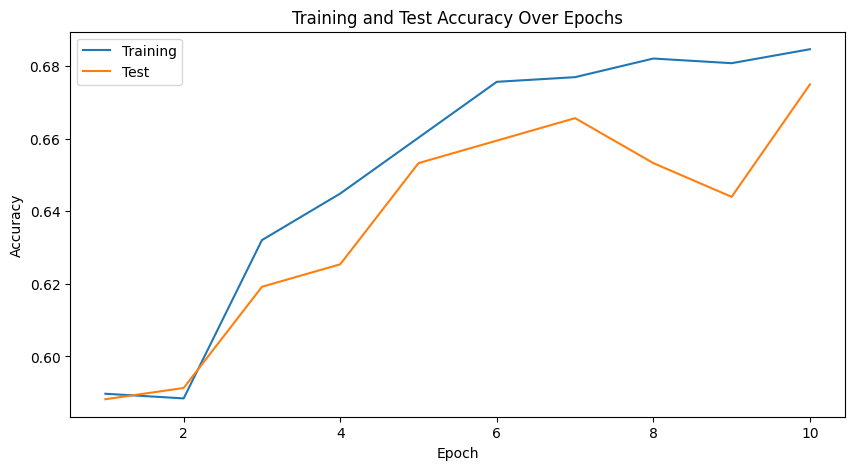

In [134]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracies, label="Training")
plt.plot(epochs, test_accuracies, label="Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy Over Epochs")
plt.legend()
plt.show()

## Attention LSTM

In [ ]:
%cd ../prediction_model
from lstm_attention import LSTMWithAttention
%cd -

input_size = X_train_tensor.shape[2]
hidden_size = 64
output_size = 1

model = LSTMWithAttention(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
batch_size = 32 

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    permutation = torch.randperm(X_train_tensor.size(0))
    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_X, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        optimizer.zero_grad()

        predictions = model(batch_X).squeeze()
        loss = criterion(predictions, batch_y)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    predictions = (predictions >= 0.5).float()  # Apply threshold for binary classification

    # Calculate accuracy
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

/Users/djmoon/Desktop/CSE151A/PrizePicksPredictor/prediction_model
/Users/djmoon/Desktop/CSE151A/PrizePicksPredictor/Preprocessing
Epoch 1/10, Loss: 19.3166
Epoch 2/10, Loss: 19.0640
Epoch 3/10, Loss: 19.0337
Epoch 4/10, Loss: 18.9777
Epoch 5/10, Loss: 18.8225
Epoch 6/10, Loss: 18.7896
Epoch 7/10, Loss: 18.7941
Epoch 8/10, Loss: 18.5913
Epoch 9/10, Loss: 18.8759
Epoch 10/10, Loss: 18.6032
Test Accuracy: 58.54%


## Stacked LSTM

In [238]:
%cd ../prediction_model
from lstm_stacked import StackedLSTM
%cd -

input_size = X_train_tensor.shape[2]
hidden_size = 64
output_size = 1
num_layers = 2
dropout = 0

model = StackedLSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers, dropout=dropout)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
batch_size = 32 

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    permutation = torch.randperm(X_train_tensor.size(0))
    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_X, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        optimizer.zero_grad()

        predictions = model(batch_X).squeeze()
        loss = criterion(predictions, batch_y)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    predictions = (predictions >= 0.5).float()  # Apply threshold for binary classification

    # Calculate accuracy
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy * 100:.2f}%")


/Users/djmoon/Desktop/CSE151A/PrizePicksPredictor/prediction_model
/Users/djmoon/Desktop/CSE151A/PrizePicksPredictor/Preprocessing
Epoch 1/10, Loss: 19.0894
Epoch 2/10, Loss: 18.8028
Epoch 3/10, Loss: 18.7796
Epoch 4/10, Loss: 18.7822
Epoch 5/10, Loss: 18.6915
Epoch 6/10, Loss: 18.6100
Epoch 7/10, Loss: 18.5070
Epoch 8/10, Loss: 18.2086
Epoch 9/10, Loss: 17.7687
Epoch 10/10, Loss: 16.9480
Test Accuracy: 63.41%
